# Concrete Mixture - Compressive Strength Prediction

## Feature Engineering & Performance Tuning

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

The strength is expected to be maximum on certain combinations of the ingredient material & strength tends to decrease on certain combinations. The objective of this project is to model the strength of high performance concrete.

In [1]:
##Import neccesary packages required for exploratory data analysis & visualisation
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing statistical packages
from scipy import stats
from scipy.stats import zscore
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Import the raw file
concrete=pd.read_csv("concrete.csv")

#### Attribute Information

* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)
* Concrete compressive strength measured in MPa

The data is organised in such a manner that for the various compositions that are tried out with concrete, strength is assessed for various days (age).The general thumb rule is strength is expected to increase over a period of time if we use a right composition for concrete.

#### Exploratory Data Analysis

In [4]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


It could be seen from sample data that various combinations are tried out to find the best combination of ingredients that yields highest compressive strength. For some combinations that are tried out, some ingredients are not added & hence we could see 0s in certain data points.

In [5]:
#5 Point Summary of the data
concrete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete.shape

(1030, 9)

In [8]:
concrete.dropna(axis=0,inplace=True)
print("Number of columns after dropping null values:",concrete.shape)

Number of columns after dropping null values: (1030, 9)


In [9]:
concrete.dropna(axis=0,inplace=True)
print("Number of columns after dropping null values:",concrete.shape)

Number of columns after dropping null values: (1030, 9)


It could be seen that we have 1030 distinct records & all of them are Not Nulls. Hence there is no need to handle null values in this dataset. However, we might have to look for handling outliers which will be discussed in later part of this project 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001596299D6C8>,
      dtype=object)

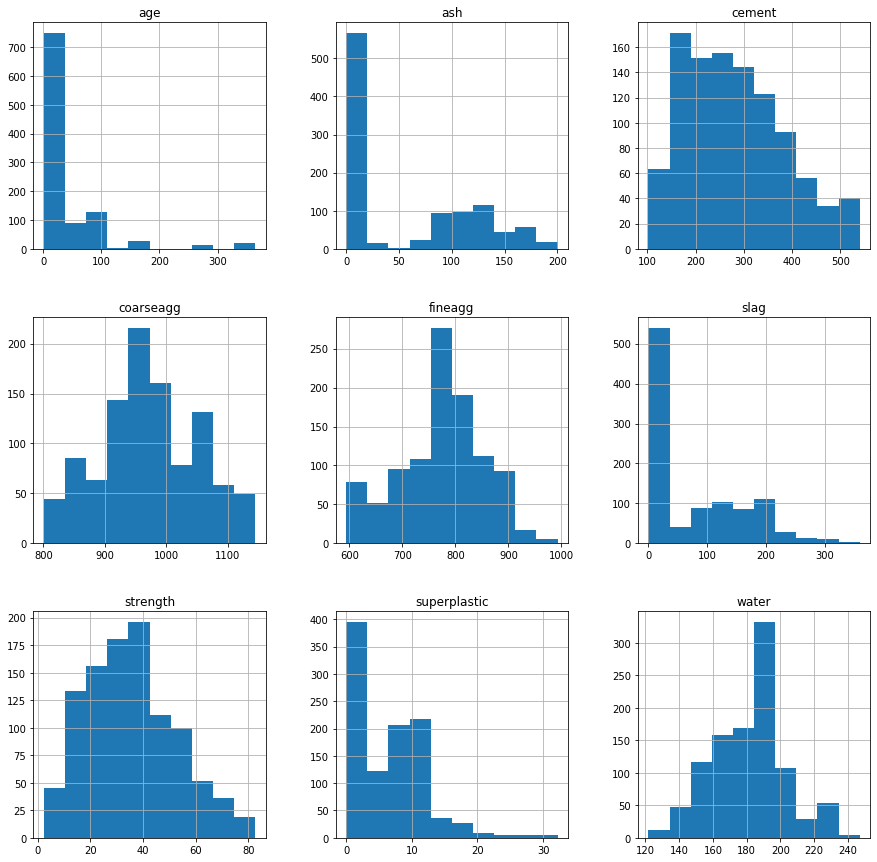

In [10]:
concrete.hist(figsize=(15,15))

The following columns are normally distributed: strength, lineagg, water
The following columns are skewed: cement, slag
The following columns have multiple gaussians: age, Superplastic, coarseagg, ash

##### Detecting Outliers

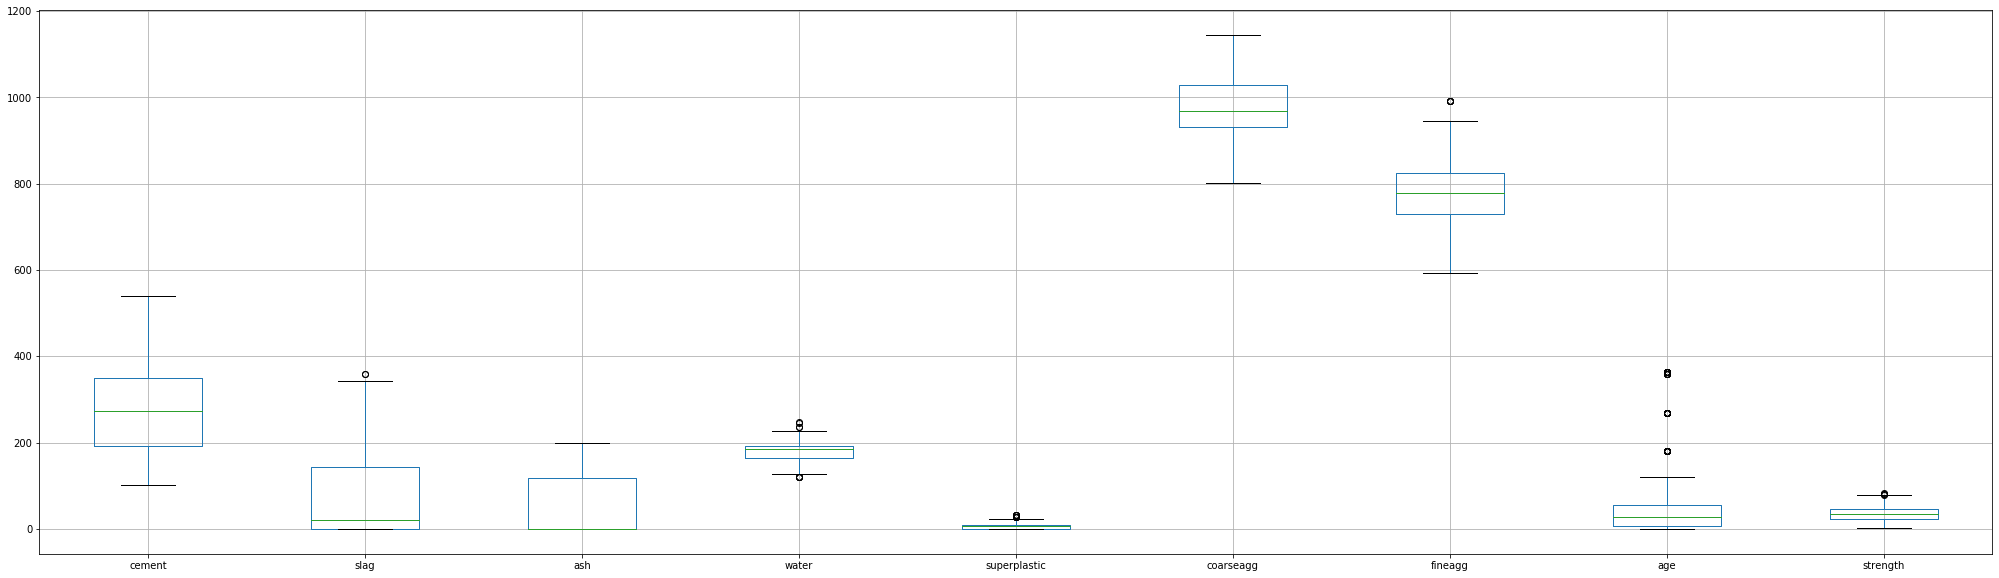

In [11]:
concrete.boxplot(figsize=(35,10))

It could be seen that few columns like slag, superplastic,fineagg,age have outliers. However, we might not be able to consider age into consideration for outlier detection for a reason that the age is the category against which the strength is measured for various combinations. If we alter age, the resulting output might not be accurate

Total outliers in p.axis aspect ratio: 0


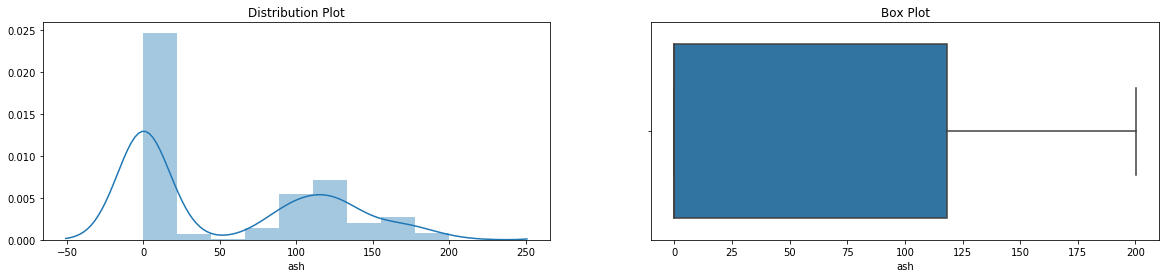

In [12]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['ash'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['ash'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['ash'],0.25)
q2 = np.quantile(concrete['ash'],0.50)
q3 = np.quantile(concrete['ash'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['ash']>outlier_h].shape[0]+concrete[concrete['ash']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

Total outliers in p.axis aspect ratio: 2


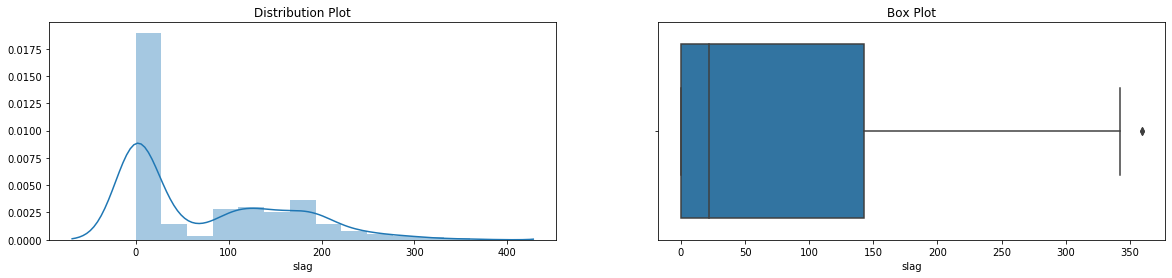

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['slag'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['slag'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['slag'],0.25)
q2 = np.quantile(concrete['slag'],0.50)
q3 = np.quantile(concrete['slag'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['slag']>outlier_h].shape[0]+concrete[concrete['slag']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

Total outliers in p.axis aspect ratio: 10


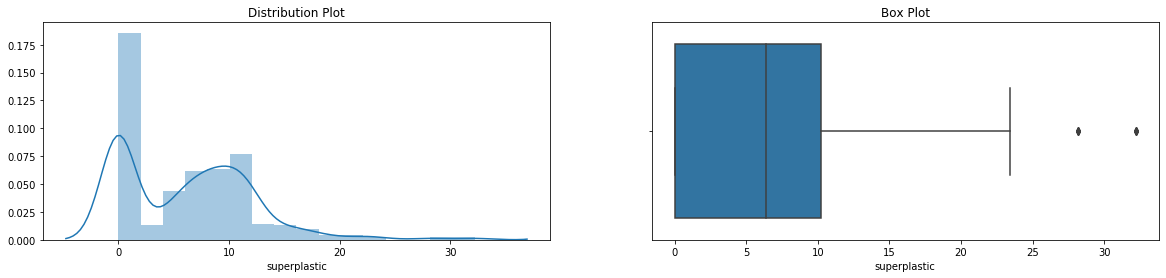

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['superplastic'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['superplastic'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['superplastic'],0.25)
q2 = np.quantile(concrete['superplastic'],0.50)
q3 = np.quantile(concrete['superplastic'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['superplastic']>outlier_h].shape[0]+concrete[concrete['superplastic']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

Total outliers in p.axis aspect ratio: 4


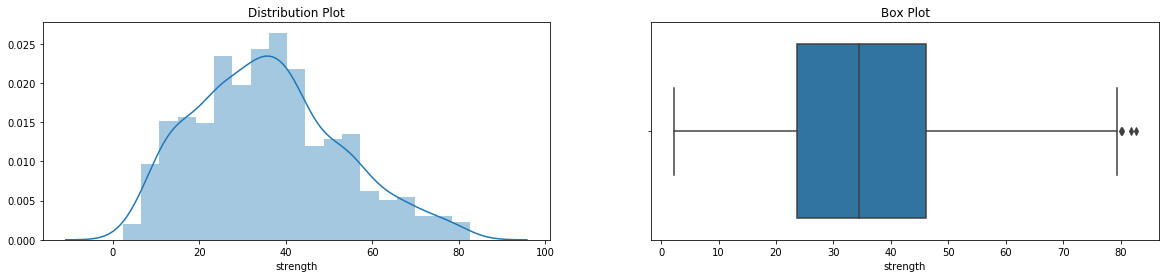

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['strength'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['strength'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['strength'],0.25)
q2 = np.quantile(concrete['strength'],0.50)
q3 = np.quantile(concrete['strength'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['strength']>outlier_h].shape[0]+concrete[concrete['strength']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

Total outliers in p.axis aspect ratio: 9


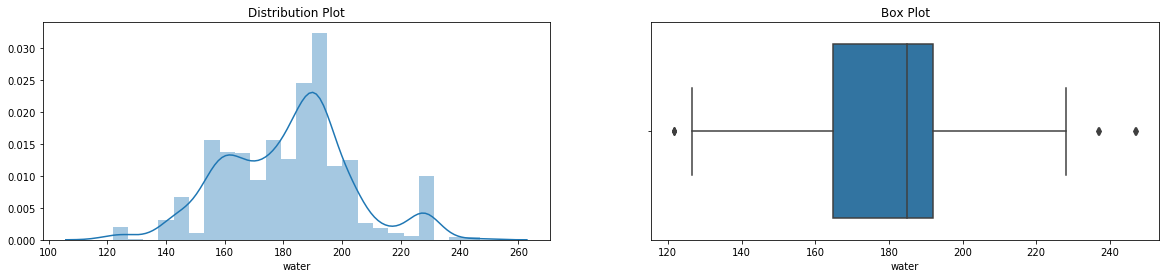

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['water'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['water'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['water'],0.25)
q2 = np.quantile(concrete['water'],0.50)
q3 = np.quantile(concrete['water'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['water']>outlier_h].shape[0]+concrete[concrete['water']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

Total outliers in p.axis aspect ratio: 0


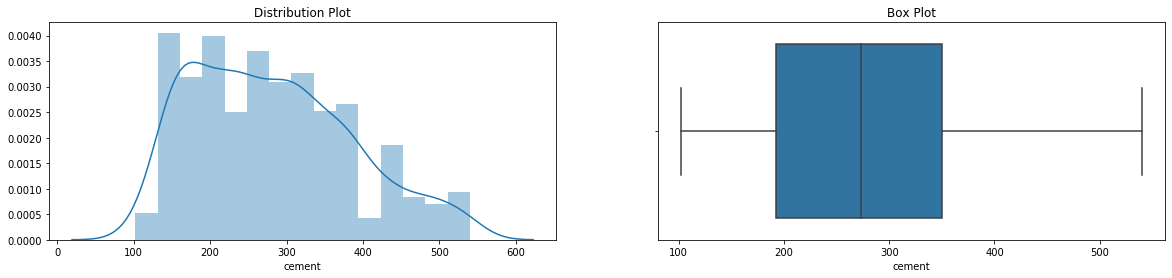

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)

sns.distplot(concrete['cement'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(concrete['cement'],ax=ax2)
ax2.set_title("Box Plot")

#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(concrete['cement'],0.25)
q2 = np.quantile(concrete['cement'],0.50)
q3 = np.quantile(concrete['cement'],0.75)
IQR = q3-q1
outlier_h = q3 + 1.5*IQR
outlier_l= q1 - 1.5*IQR
out_tot=concrete[concrete['cement']>outlier_h].shape[0]+concrete[concrete['cement']<outlier_l].shape[0]
print("Total outliers in p.axis aspect ratio:",out_tot)

### Multivariate Analysis

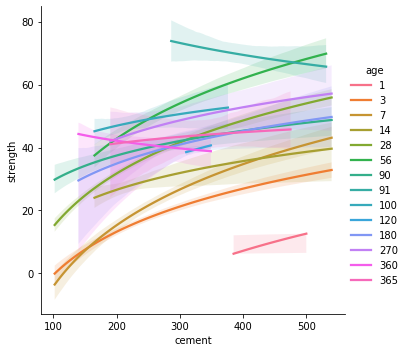

In [18]:
sns.lmplot(data=concrete,x="cement", y="strength", hue="age", scatter=False,ci=95, x_estimator=np.mean, logx=True )

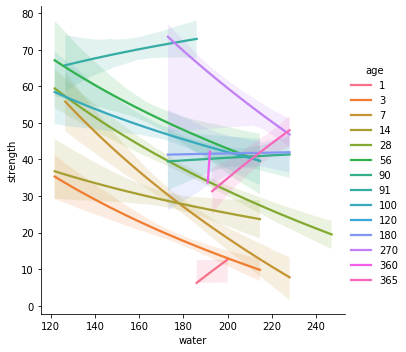

In [19]:
sns.lmplot(data=concrete,x="water", y="strength", hue="age", scatter=False,ci=95, x_estimator=np.mean, logx=True )

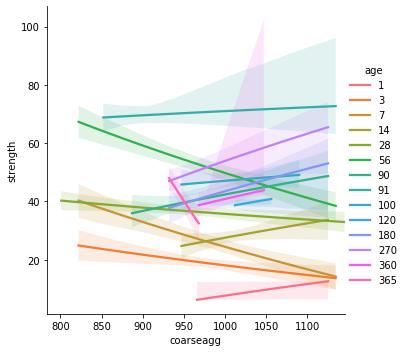

In [20]:
sns.lmplot(data=concrete,x="coarseagg", y="strength", hue="age", scatter=False,ci=95, x_estimator=np.mean, logx=True )

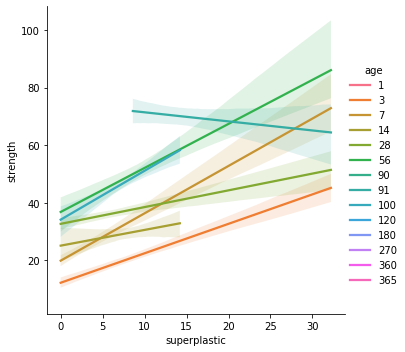

In [21]:
sns.lmplot(data=concrete,x="superplastic", y="strength", hue="age", scatter=False,ci=95, x_estimator=np.median )

From the above plots, it could be seen that cement & superplastic increases the strength of concrete as time increases (i.e when age increases) in most of the cases. In contrary, adding more water to the concrete decreases the strength of the concrete & the slope is more for both the cases - cement, superplastic & water.

Columns like Coarseagg, fineagg etc has mixed response against time. There is no clear direction followed by them. For illustration purpose, we have displayed the imppact of coarseagg 

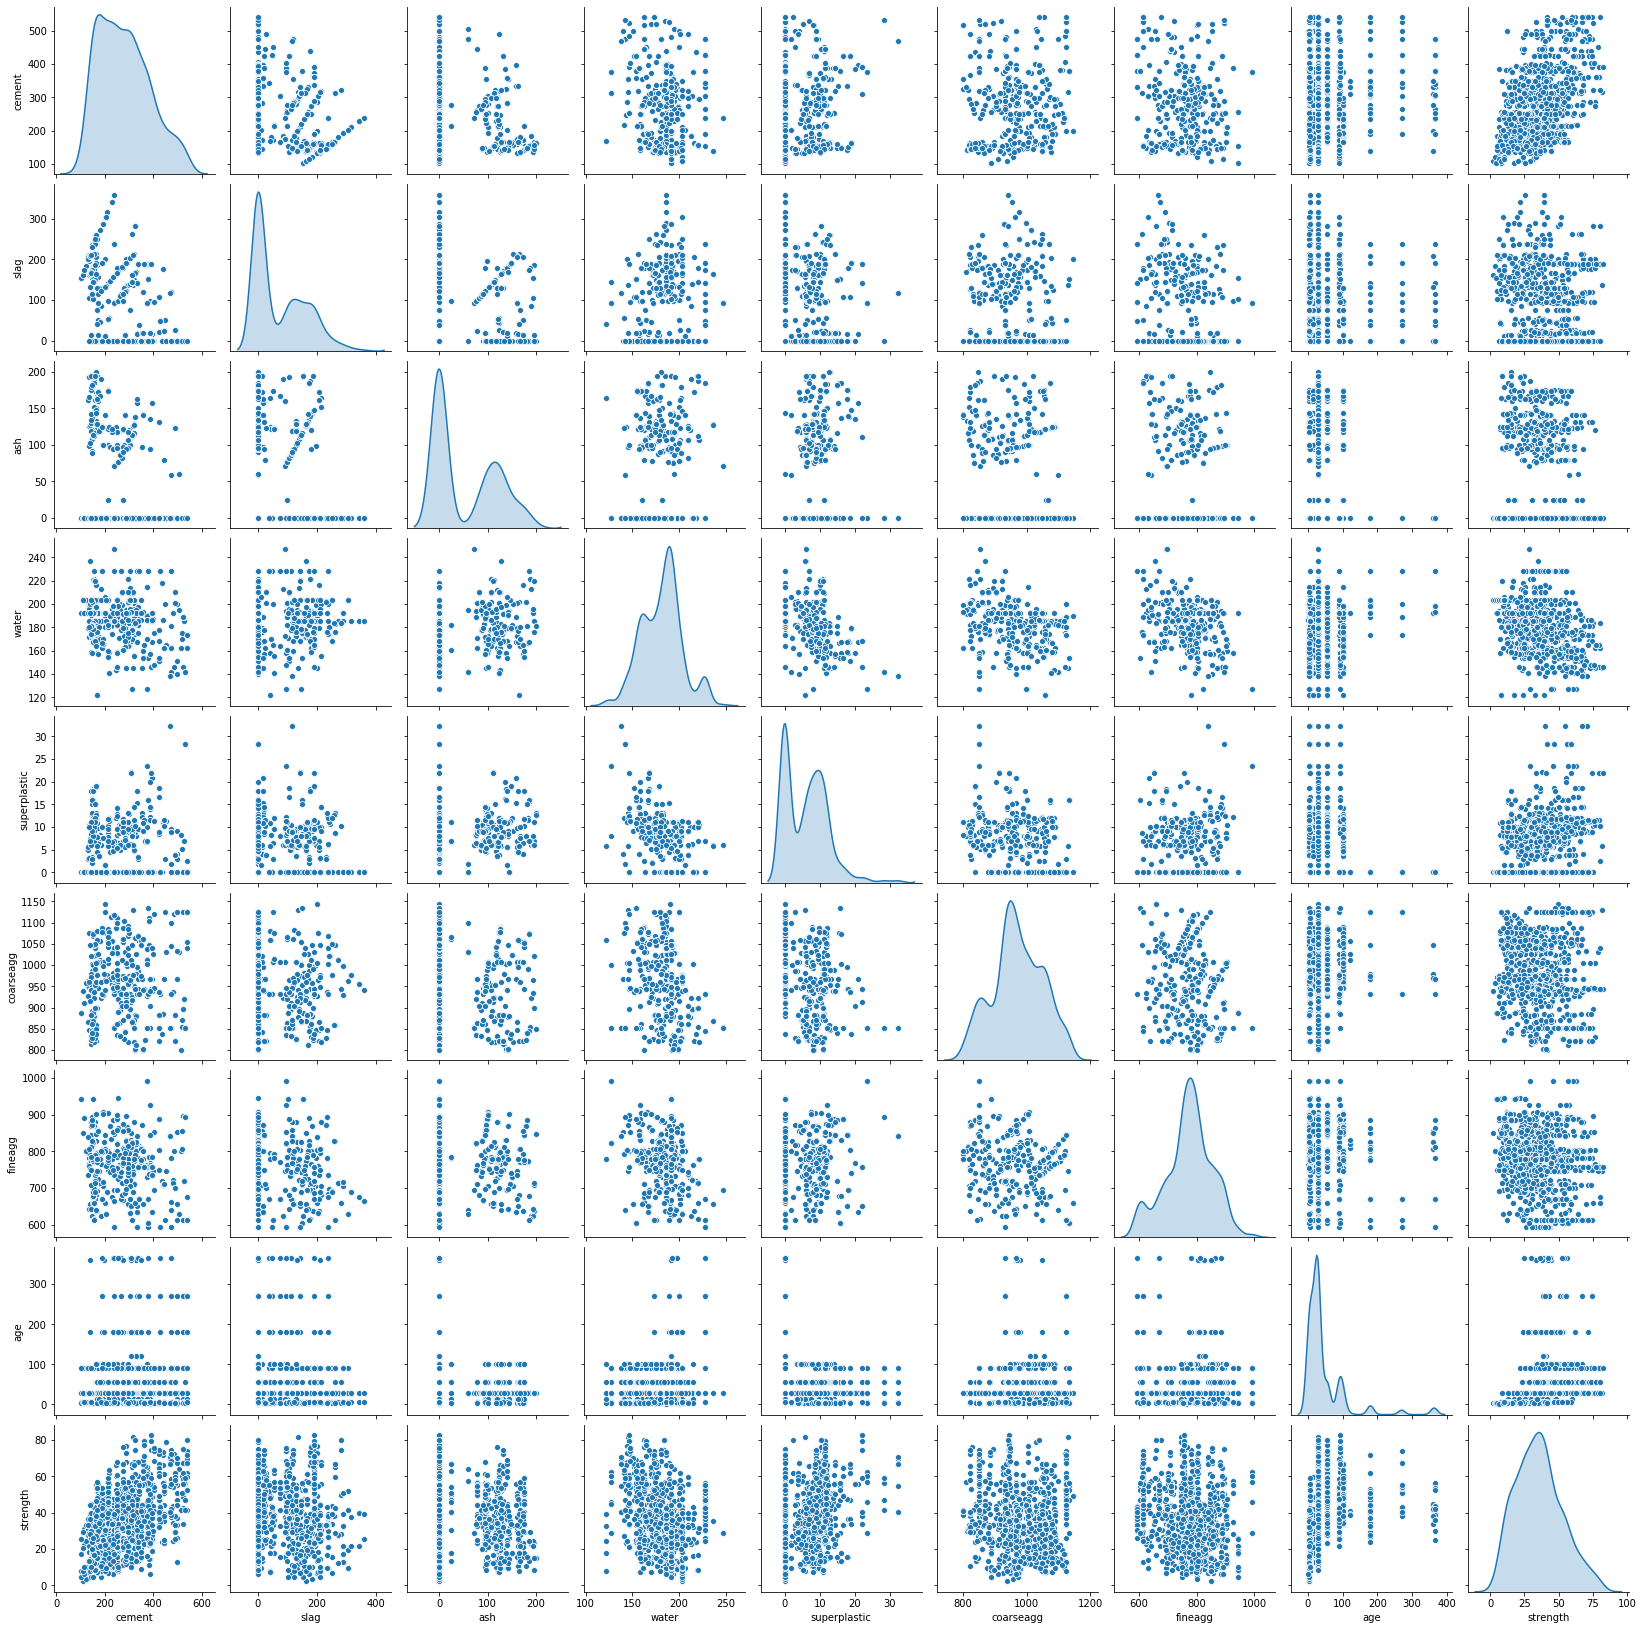

In [22]:
sns.pairplot(concrete, diag_kind='kde')

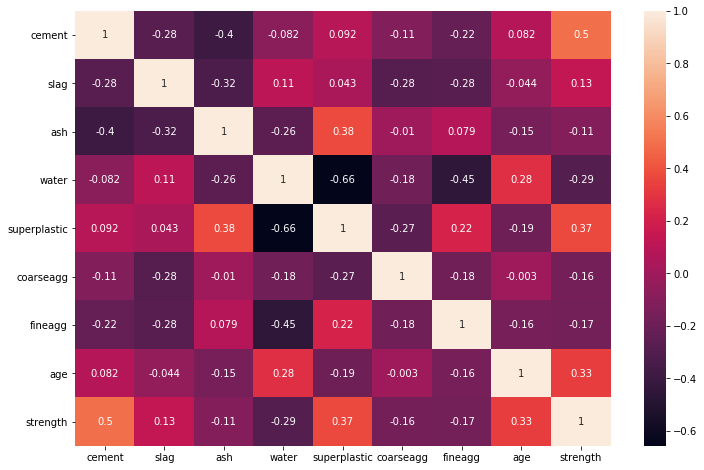

In [23]:
corr=concrete.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,)

In [24]:
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In case there are multiple columns that are strongly correlated to each other, we could possibly consider removing the redundant columns. In our dataset,it could be inferred from the above charts that each of the data items are not strongly correlated to the other data items. The maximum correlation is only around 0.5  on the positive side & 0.65 on the negative side.

From the above plots, we can understand that each of the columns have distinct properties & there seems to be no strong correlation between them. 

When we consider strength into account, the following columns seem to have more impact: cement, superplastic, water(highly negative). The remaining columns like ash, coarseagg, fineagg etc doesn't seem to contribute to strength

For a given value of age, we have different values of strength. Hence, It is not a good predictor. Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them. So, Linear model model will not fetch accurate results 

#### Handling Outliers

In [25]:
 #Replacing the outliers by median
for col_name in concrete.columns[:-1]:
    q1 = concrete[col_name].quantile(0.25)
    q3 = concrete[col_name].quantile(0.75)
    iqr = q3 - q1    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete.loc[(concrete[col_name] < low) | (concrete[col_name] > high), col_name] = concrete[col_name].median()

Applying z score: since we have data from multiple units, there is a need to apply z-score

In [26]:
concrete_z = concrete.apply(zscore)
concrete_z=pd.DataFrame(concrete_z,columns=concrete.columns)

#### Test Train Split

In [27]:
X=concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Linear Regression

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
LinearRegression()
reg.coef_

array([ 0.63290543,  0.3324306 ,  0.12589004, -0.2049842 ,  0.10604997,
       -0.03605227, -0.04987837,  0.51905486])

#### Decision Tree

Let us fit decision tree model to find out the important features that are present in the dataset

In [29]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
print('Feature importances: \n',pd.DataFrame(reg.coef_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.632905
slag          0.332431
ash           0.125890
water        -0.204984
superplastic  0.106050
coarseagg    -0.036052
fineagg      -0.049878
age           0.519055


It could be seen that cement, water,slag, superplastic (& age obviously) contribute more to the features & this was witnessed during the visual representation also

In [31]:
y_pred = dt_model.predict(X_test)
print('Performance of train data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance of test data using Decision Tree:',dt_model.score(X_test,y_test))

#Evaluate the model using accuracy
acc_dt=metrics.r2_score(y_test, y_pred)
print('Accuracy Decision Tree: ',acc_dt)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance of train data using Decision Tree: 0.9917907393004437
Performance of test data using Decision Tree: 0.8217957777888774
Accuracy Decision Tree:  0.8217957777888774
MSE:  0.18602029349617563


It could be seen that the model has performed well in the training dataset & has significantly reduced at test data & hence there seems to be a overfitting done here

In [32]:
# Created a dataframe view to add the accuracy results of various models that will be tried out. 
# An additional row will be added to this view for each model

results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_dt]},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796


In [33]:
#independent and dependent variables
X=concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]

#### K-Fold - Decision Tree

In [34]:
num_folds = 18
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
#mse=metrics.root_mean_squared_error(results1,y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8663281505086656
Standard Deviation:  0.043392775555345986


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Decision Tree K Fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328


#### Decision Tree - After dropping insignificant columns 

In [36]:
concrete_2=concrete_z.copy()
concrete_2.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727


In [37]:
X = concrete_2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [38]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance of train data using Decision Tree (after removing insignificant columns):',dt_model.score(X_train,y_train))
# performance on test data
print('Performance of test data using Decision Tree (after removing insignificant columns):',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy of Decision Tree: ',acc_DT)

Performance of train data using Decision Tree (after removing insignificant columns): 0.991045963372976
Performance of test data using Decision Tree (after removing insignificant columns): 0.843116697213919
Accuracy of Decision Tree:  0.843116697213919


It could be seen that the model has performed well in the training dataset & has significantly reduced at test data & hence there seems to be a overfitting done. Dropping insignificant columns has no / minimal impact in the accuracy & performance of the decision tree

In [40]:
#Adding the results to existing view
tempResultsDf = pd.DataFrame({'Method':['Decision Tree - after removing insignificant cols'], 'accuracy': [accuracy]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328


#### K-Fold - Decision Tree (after dropping insignificant columns)

In [41]:
num_folds = 18
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8656814517302239
Standard Deviation:  0.04402503002527184


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [42]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.368469
slag          0.107228
water         0.159730
superplastic  0.035638
age           0.328935


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


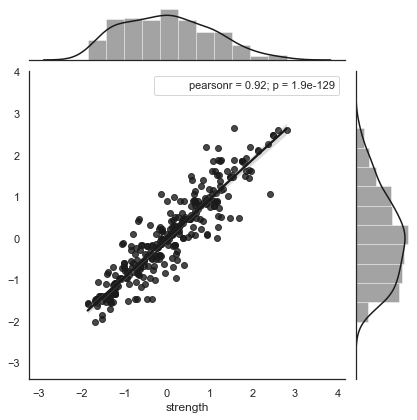

In [43]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

It could be seen that the test values and predicted are strongly correlated with a pearson coefficient of 0.92

#### Decision Tree Regressor - Pruning

In [44]:
X=concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [45]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

##### Visual representation of Pruned Tree

In [46]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot
bank_df=concrete_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/RaviSharma/.conda/pkgs/graphviz-2.38-hfd603c8_2/Library/bin'

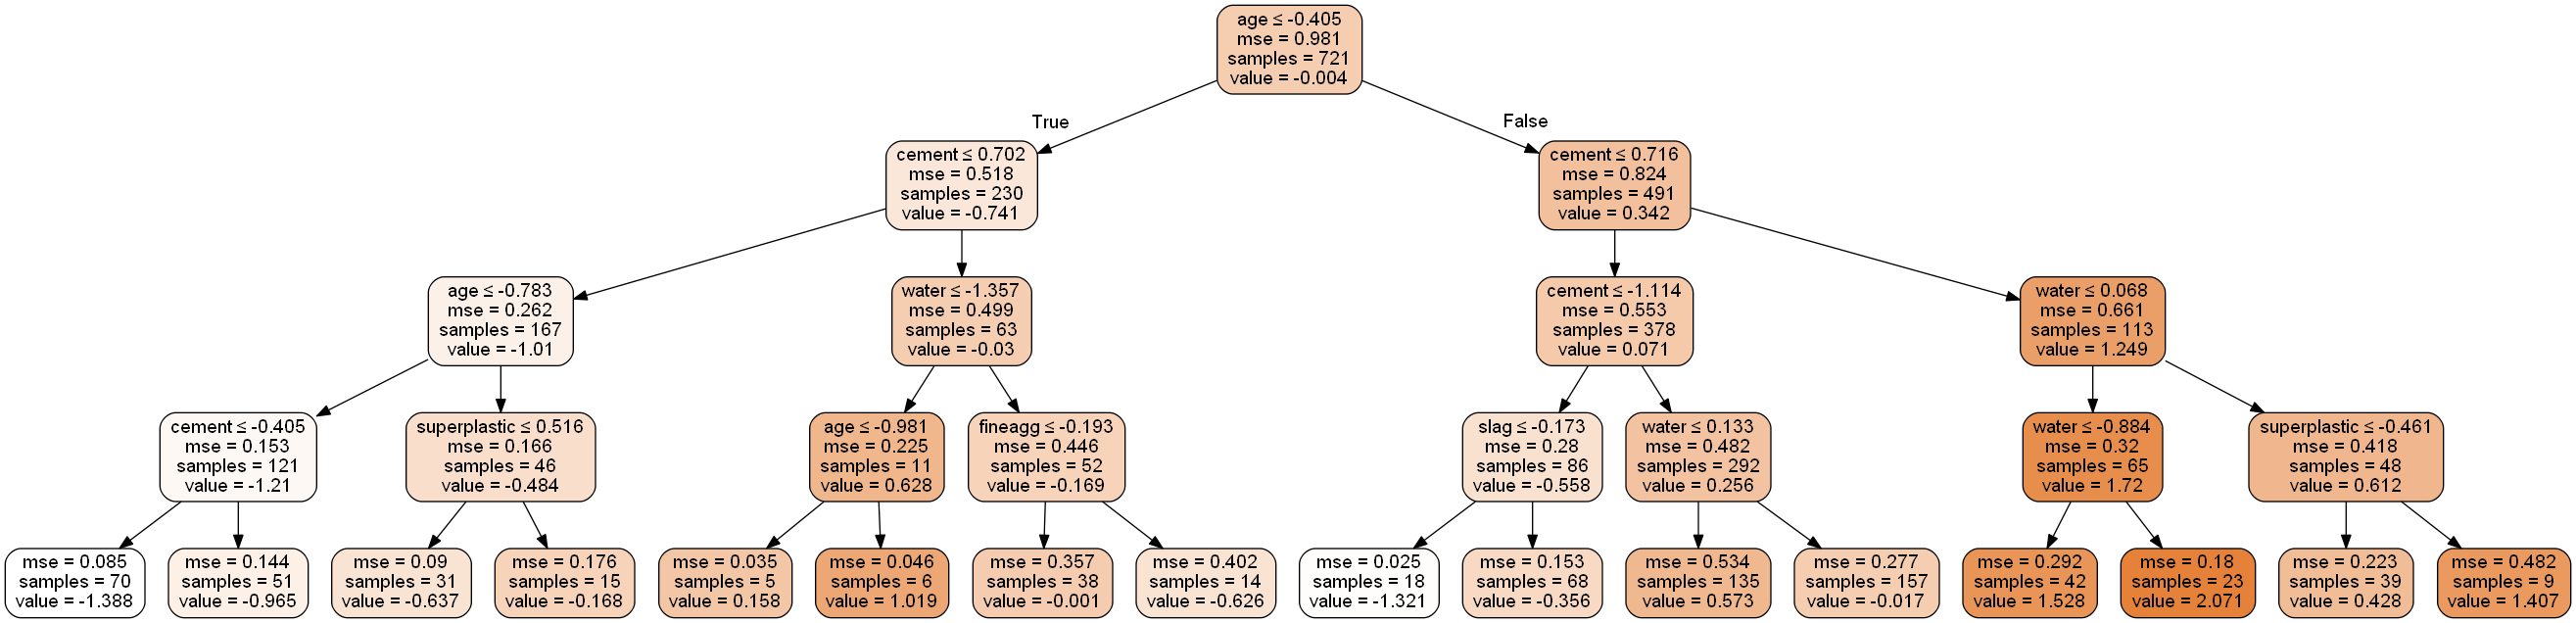

In [48]:
#Let's try to build a decision tree
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [49]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance of train data using Decision Tree - Pruning:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance of test data using Decision Tree - Pruning:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance of train data using Decision Tree - Pruning: 0.7255811799299218
Performance of test data using Decision Tree - Pruning: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [50]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828


#### K Fold - Decision Tree Regressor - Pruning

In [51]:
num_folds = 18
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6745523114433877
Standard Deviation:  0.08608318690710857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [52]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree K Fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552


It could be seen that after pruning the data trimming it to 4 levels, the accuracy has reduced significantly & hence it could not be used for our prediction 

#### Pruned Decision Tree after removing insignificant columns

In [53]:
concrete_3=concrete_z.copy()

X = concrete_3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [54]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [55]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance of train data using Decision Tree:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance of test data using Decision Tree:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance of train data using Decision Tree: 0.7249584363084667
Performance of test data using Decision Tree: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [56]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree after dropping'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468


#### K Means Clustering

In [57]:
cluster_range = range( 1, 18 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:18]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141025e+07
3,4,1.868633e+07
4,5,1.659585e+07
5,6,1.469773e+07
6,7,1.350932e+07
7,8,1.238898e+07
8,9,1.136064e+07
9,10,1.058975e+07


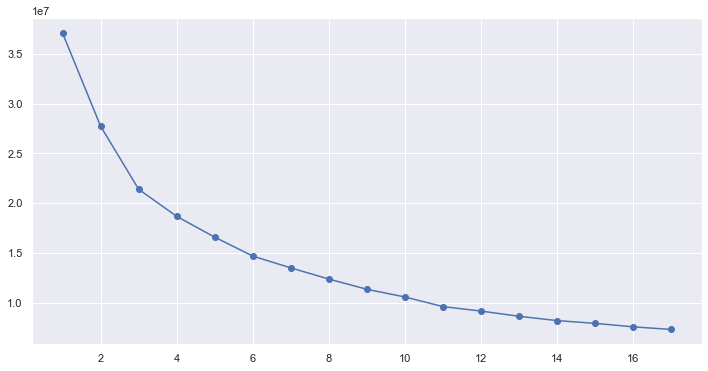

In [58]:
#Elbow Plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [59]:
cluster = KMeans( n_clusters = 8, random_state = 2354 )
cluster.fit(concrete_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [60]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_z)
concrete_z["GROUP"] = prediction  

In [61]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.40355214, -0.85653994, -0.84714393,  0.43679319, -1.04889501,
         0.530608  ,  0.32113784, -0.4980044 , -0.70089476],
       [-0.45517794,  0.21981099,  1.10067328,  0.50829143,  0.50701382,
        -1.19891339, -0.35595648, -0.21313184, -0.25144689],
       [-0.56415322, -0.67005607,  1.13344167, -0.59665301,  0.5269409 ,
         0.54402301,  0.39918326, -0.57576961, -0.59805326],
       [ 1.83024861, -0.34245817, -0.80284952, -0.23057828, -0.43183229,
         1.73997088, -1.82725769, -0.05463132,  1.10906189],
       [ 0.55628202,  0.28653432, -0.76589469,  1.93618488, -1.02967694,
        -0.53630383, -1.60041564,  0.45552678,  0.51794037],
       [ 1.02608277,  0.47957892, -0.50204512, -1.01669096,  1.04411306,
        -0.79211992,  0.31923898,  0.07626471,  1.21509842],
       [-0.89084139,  1.38930282, -0.83202486,  0.43270149, -0.66755125,
         0.05977572, -0.05090664, -0.34112721, -0.66443012],
       [-0.48220935, -0.60392421,  0.67956346, -0.36697252,  0

In [62]:
centroid = pd.DataFrame(centroids, columns = list(concrete) )
centroid

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.403552,-0.856540,-0.847144,0.436793,-1.048895,0.530608,0.321138,-0.498004,-0.700895
1,-0.455178,0.219811,1.100673,0.508291,0.507014,-1.198913,-0.355956,-0.213132,-0.251447
2,-0.564153,-0.670056,1.133442,-0.596653,0.526941,0.544023,0.399183,-0.575770,-0.598053
3,1.830249,-0.342458,-0.802850,-0.230578,-0.431832,1.739971,-1.827258,-0.054631,1.109062
4,0.556282,0.286534,-0.765895,1.936185,-1.029677,-0.536304,-1.600416,0.455527,0.517940
5,1.026083,0.479579,-0.502045,-1.016691,1.044113,-0.792120,0.319239,0.076265,1.215098
6,-0.890841,1.389303,-0.832025,0.432701,-0.667551,0.059776,-0.050907,-0.341127,-0.664430
7,-0.482209,-0.603924,0.679563,-0.366973,0.112360,0.568607,0.547738,1.758631,0.464574


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001596A18E208>,
      dtype=object)

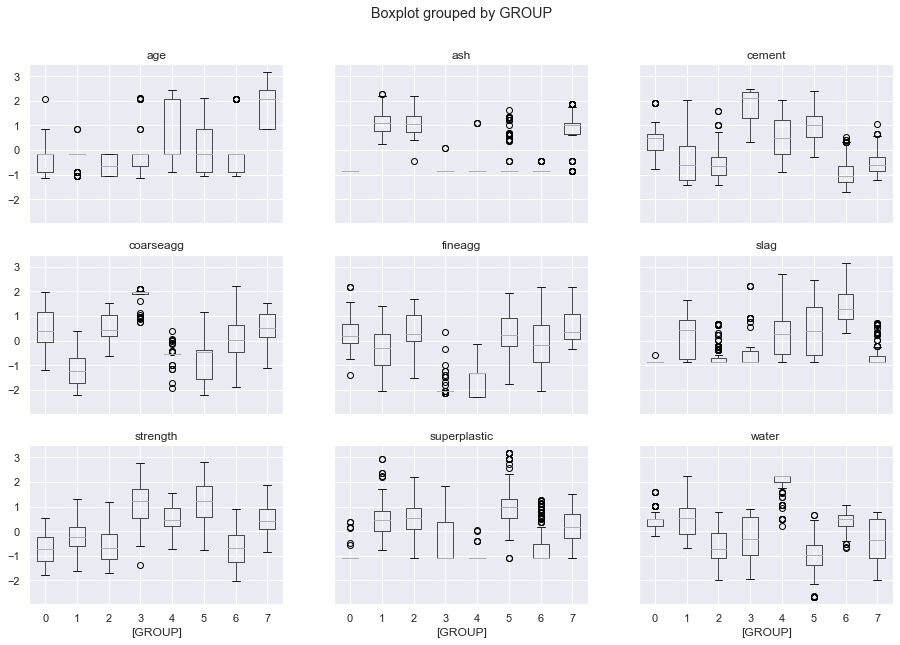

In [63]:
#import matplotlib.pylab as plt
concrete_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

It could be seen from the above box plot that none of the dimension is a strong predictor. Most of the dimensions are in a similar range.

In k means, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them

#### Random Forest

In [64]:
X=concrete_z.iloc[:,0:8]
y = concrete_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [65]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9789361562709182
Performance on testing data using RFR: 0.9033034233231457
Accuracy DT:  0.9033034233231457
MSE:  0.10093770703251717


In [67]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR] },index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303


In [68]:
num_folds = 20
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9129975120178571
Standard Deviation:  0.029821074306531754


In [69]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor K Fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998


#### Gradient Boosting Regressor

In [70]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8922574591870307
Accuracy DT:  0.8922574591870307
MSE:  0.11246814926925613


In [72]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257


In [73]:
num_folds = 20
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8995638016525275
Standard Deviation:  0.02648319251801201


In [74]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor K Fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### Ada Boosting Regressor

In [75]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [76]:
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8081888903503358
Performance on testing data using GBR: 0.7438741328966333
Accuracy DT:  0.8922574591870307
MSE:  0.11246814926925613


In [77]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


In [78]:
num_folds = 18
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.770726113695407
Standard Deviation:  0.038424819522764934


In [79]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor K Fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### Bagging Regressor

In [80]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [81]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9735594598174896
Performance on testing data using GBR: 0.8953082288392434
Accuracy DT:  0.8953082288392434
MSE:  0.10928357227634118


In [82]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


In [83]:
num_folds = 20
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9033081680747591
Standard Deviation:  0.036593220614527425


In [84]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor K Fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### K-Nearest Regression

In [85]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

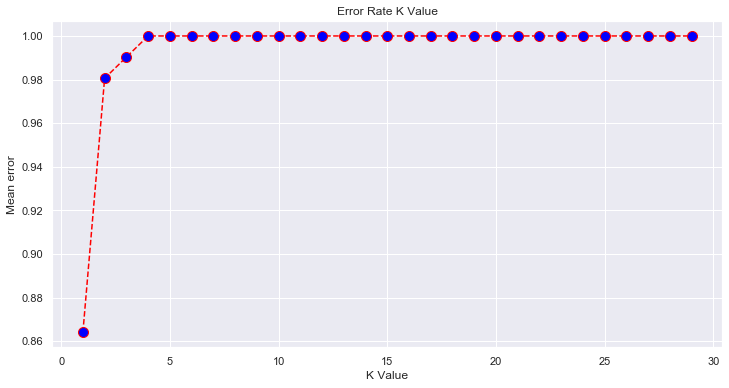

In [86]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [87]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [88]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [89]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### K Fold - KNN Regression

In [90]:
num_folds = 30
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
#Adding the results to existing view
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.791265681749521
Standard Deviation:  0.06617056736946313


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [91]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['KNN Regressor K Fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### Support Vector Regression 

In [92]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [93]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [94]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### K Fold - Support Vector Regressor

In [95]:
num_folds = 10
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [96]:
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### Ensemble Regressor

In [97]:
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [98]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [99]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894734
Accuracy ensemble:  0.7849191766894734
MSE:  0.22451430937603256


In [100]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


#### K Fold - Ensemble Regressor 

In [101]:
num_folds = 10
seed = 100
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
mse=metrics.mean_squared_error(y_test, y_pred)
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796722


In [102]:
#Adding the results to existing view

tempResultsDf = pd.DataFrame({'Method':['Ensemble K Fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.821796
2,Decision Tree K Fold,0.866328
3,Decision Tree - after removing insignificant cols,0.866328
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree K Fold,0.674552
6,Pruned Decision Tree after dropping,0.663468
7,Random Forest Regressor,0.903303
8,Random Forest Regressor K Fold,0.912998
9,Gradient Boost Regressor,0.892257
10,Gradient Boost Regressor K Fold,0.899564


Random Forest Regressor, Random Forest Regressor K Fold, Gradient Boost Regressor, Gradient Boost Regressor K Fold, Bagging Regressor, Bagging Regressor K Fold are the models that gives better accuracy in comparison to other models overall.

Since the data have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

In [103]:
concrete_XY = X.join(y)
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

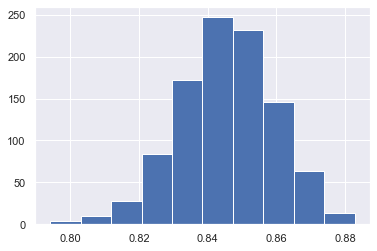

95.0 confidence interval 81.7% and 87.1%


In [104]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [105]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])

    stats.append(score)

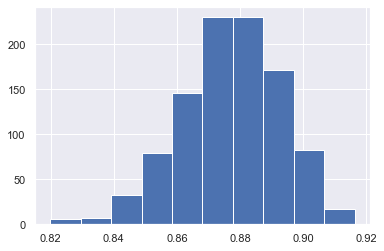

95.0 confidence interval 84.4% and 90.5%


In [106]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [107]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = BaggingRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])

    stats.append(score)

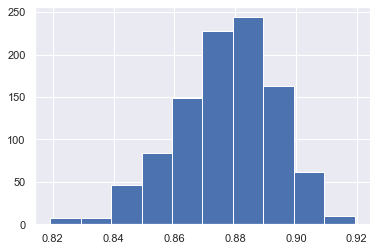

95.0 confidence interval 84.3% and 90.6%


In [108]:
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))